# 针孔成像实际数据统计分析

第二个数据集（赵总提供，已经过标定），验证标定后的测量精度。

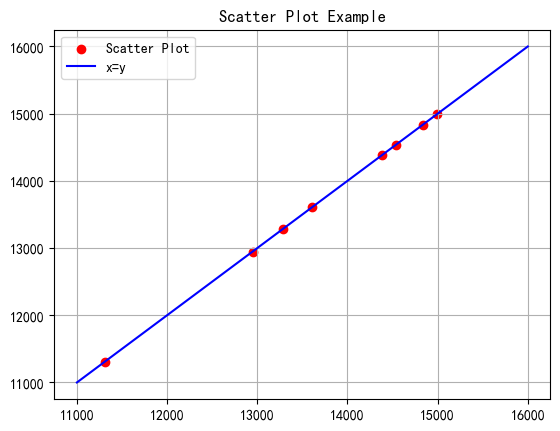

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体或其他支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示负号

# plt.figure()
# # 系统拍摄图像的水平尺度
# x_image = []
# # 显微镜测量水平尺度
# x_measurement = []
# plt.plot(x_image,x_measurement)

plt.figure()
# 系统拍摄图像的面积
area_image = [0.0143,0.0148,0.0135,0.0131,0.0131,0.0145,0.0121,0.0144]
area_image = [x*1e6 for x in area_image]
# 显微镜测量面积
area_image = [14384.9,14833.5,13606.9,13288.5,12947.8,14537.5,11309.7,14994.2]
plt.scatter(area_image, area_image, label='Scatter Plot', color='red', marker='o')

# 创建x和y的数据
x = np.linspace(11000, 16000, 100)  # 生成在-10到10之间的100个均匀分布的点
y = x  # y等于x
# 绘制x=y曲线
plt.plot(x, y, label='x=y', color='blue')

plt.title('Scatter Plot Example')
plt.legend()
plt.grid(True)
plt.show()

# 高精度面阵相机采图 分析

In [2]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 定义一个函数，用于读取图像并进行3D可视化
def visualize_images(image_files):
    # 创建一个新的3D图形
    fig = plt.figure(figsize=(80, 40))  # 调整figure大小

    # 循环处理传入的图像文件
    for i, image_path in enumerate(image_files):
        # 读入图像
        image = plt.imread(image_path)

        # 获取图像的高度和宽度
        height, width = image.shape

        # 创建网格
        x = np.arange(0, width, 1)
        y = np.arange(0, height, 1)
        X, Y = np.meshgrid(x, y)

        # 创建3D坐标网格
        Z = image

        # 创建3D子图
        ax = fig.add_subplot(1, len(image_files), i+1, projection='3d')

        # 绘制3D表面
        surf = ax.plot_surface(X, Y, Z, cmap='viridis')

        # 设置Z轴刻度范围
        ax.set_zlim(0, 20)

        # 设置图形标题
        folder_name, image_file = os.path.split(image_path)
        ax.set_title(image_file)

    # 显示图形
    plt.show()

# 文件路径
image_files = [
    "Dataset/ZZMImgs/0.008精度/脏印10um-压力-2.bmp",
    "Dataset/ZZMImgs/0.008精度/脏印10um-压力.bmp",
    "Dataset/ZZMImgs/0.008精度/脏印20um-压力.bmp",
    "Dataset/ZZMImgs/0.008精度/脏印50um-压力.bmp",
    "Dataset/ZZMImgs/0.008精度/脏印100um-压力.bmp"
]

# 调用函数，传入文件路径列表
visualize_images(image_files)

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/ZZMImgs/0.008精度/脏印10um-压力-2.bmp'

<Figure size 8000x4000 with 0 Axes>

## 结果分析
10um存在明显的衍射效应。

函数：单张图像的3D可视化

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from PIL import Image
import os  # 用于获取文件名

# 输入图像路径
image_path = "Dataset/ZZMImgs/0.008精度/脏印20um-压力-裁切.bmp"  # 请替换为你的图像路径

def Visualization3D(input_data, cmap='viridis', fontsize=20):
    if isinstance(input_data, str):
        # 如果输入是文件路径，打开图像
        image = Image.open(input_data)
    elif isinstance(input_data, plt.Axes):
        # 如果输入是plt格式的image
        image = input_data

    # 将图像数据转换为NumPy数组
    image_array = np.array(image)

    # 创建3D可视化
    fig = plt.figure(figsize=(20,15))
    ax = fig.add_subplot(111, projection='3d')

    # 获取图像的尺寸
    width, height = image_array.shape

    # 创建网格
    x = np.arange(0, height, 1)
    y = np.arange(0, width, 1)
    x, y = np.meshgrid(x, y)

    # 使用plt.surface创建3D可视化
    surf = ax.plot_surface(x, y, image_array, cmap='viridis')

    # 设置坐标轴标签
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensity')

    # 添加标题
    filename = os.path.basename(image_path)
    plt.title(filename,fontsize=20)
    # 显示可视化
    plt.show()

Visualization3D(image_path)

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义伽马变换函数
def gamma_correction(image, gamma):
    gamma_image = image.copy()
    gamma_image = np.array(gamma_image) / 255.0
    gamma_image = np.power(gamma_image, 1.0 / gamma)
    gamma_image = (gamma_image * 255).astype(np.uint8)
    return Image.fromarray(gamma_image)

# 定义拉伸暗部和压缩亮部函数
def stretch_and_compress(image, a, b):
    sc_image = image.copy()
    sc_image = np.array(sc_image)
    sc_image = a * sc_image + b
    sc_image = np.clip(sc_image, 0, 255).astype(np.uint8)
    return Image.fromarray(sc_image)

# 文件路径
image_files = [
    "Dataset/ZZMImgs/0.008精度/脏印10um-压力-2.bmp",
    "Dataset/ZZMImgs/0.008精度/脏印10um-压力.bmp",
    "Dataset/ZZMImgs/0.008精度/脏印20um-压力.bmp",
    "Dataset/ZZMImgs/0.008精度/脏印50um-压力.bmp",
    "Dataset/ZZMImgs/0.008精度/脏印100um-压力.bmp"
]

# 遍历处理每个图像文件
for image_file in image_files:
    # 打开图像文件
    image = Image.open(image_file)
    
    # 获取文件名作为标题
    filename = os.path.basename(image_file)
    
    # 伽马变换
    gamma_value = 20  # 调整伽马值
    gamma_corrected_image = gamma_correction(image, gamma_value)
    
    # 拉伸暗部和压缩亮部
    a = 5  # 调整拉伸因子
    b = -20  # 调整压缩因子
    sc_image = stretch_and_compress(image, a, b)
    
    # 创建3D可视化结果
    fig = plt.figure(figsize=(75,25))
    
    # 添加标题为文件名
    fig.suptitle(filename, fontsize=14)
    
    # 原图的3D可视化
    Visualization3D(image_file)
    # 伽马变换后的3D可视化
    Visualization3D(gamma_corrected_image)
    # 拉伸暗部和压缩亮部后的3D可视化
    Visualization3D(sc_image)

    # # 原图的3D可视化
    # ax = fig.add_subplot(231, projection='3d')
    # width, height = image.size
    # x, y = np.meshgrid(np.arange(width), np.arange(height))
    # z = np.array(image)
    # ax.plot_surface(x, y, z, cmap='viridis')
    # ax.set_title("Original 3D Visualization")
    
    # # 伽马变换后的3D可视化
    # ax = fig.add_subplot(232, projection='3d')
    # z_gamma = np.array(gamma_corrected_image)
    # ax.plot_surface(x, y, z_gamma, cmap='viridis')
    # ax.set_title("Gamma Corrected 3D Visualization")
    
    # # 拉伸暗部和压缩亮部后的3D可视化
    # ax = fig.add_subplot(233, projection='3d')
    # z_sc = np.array(sc_image)
    # ax.plot_surface(x, y, z_sc, cmap='viridis')
    # ax.set_title("Stretched and Compressed 3D Visualization")
    
    # # 显示原图
    # plt.subplot(234)
    # plt.imshow(image, cmap='gray')
    # plt.title("Original Image")
    
    # # 显示伽马变换后的图像
    # plt.subplot(235)
    # plt.imshow(gamma_corrected_image, cmap='gray')
    # plt.title("Gamma Corrected")
    
    # # 显示拉伸暗部和压缩亮部后的图像
    # plt.subplot(236)
    # plt.imshow(sc_image, cmap='gray')
    # plt.title("Stretched and Compressed")
    
    # plt.show()


In [ ]:
import numpy as np
from mayavi import mlab
from PIL import Image

# 打开灰度图像
image_path = "Dataset/ZZMImgs/0.008精度/脏印20um-压力-裁切.bmp"
image = Image.open(image_path)

# 将图像转换为NumPy数组
image_array = np.array(image)

# 创建Mayavi场景
mlab.figure(size=(800, 600), bgcolor=(1, 1, 1))

# 创建灰度表面
mlab.surf(image_array, colormap="gray")

# 设置可视化参数
mlab.view(azimuth=0, elevation=90, distance=500, focalpoint=(128, 128, 0))

# 显示Mayavi可视化
mlab.show()
